In [ ]:
# !pip install finance-datareader
# !pip install mpl-finance
!pip instal yfinance

ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf
from mpl_finance import candlestick_ohlc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['lines.color']='tomato'

In [ ]:
# 한국 소형주 8개와 대형주 2개 (yfinance ticker)
korean_stocks = [
    "068270.KS",  # 셀트리온헬스케어
    "357780.KQ",  # 솔브레인
    "277810.KS",  # 레인보우로보틱스
    "096530.KQ",  # 씨젠
    "247540.KQ",  # 에코프로비엠
    "112040.KQ",  # 위메이드
    "293490.KQ",  # 카카오게임즈
    "009830.KS",  # 한화솔루션
    "005930.KS",  # 삼성전자 (대형주)
    "051910.KS"   # LG화학 (대형주)
]

# 미국 소형주 8개와 대형주 2개 (yfinance ticker)
us_stocks = [
    "ROKU",     # Roku, Inc.
    "SQ",       # Square, Inc.
    "PLUG",     # Plug Power Inc.
    "UPWK",     # Upwork Inc.
    "BYND",     # Beyond Meat, Inc.
    "RUN",      # Sunrun Inc.
    "Z",        # Zillow Group, Inc.
    "TDOC",     # Teladoc Health, Inc.
    "AAPL",     # Apple Inc. (대형주)
    "MSFT",     # Microsoft Corporation (대형주)
    "NVDA",     # Nvidea (대형 기술주)
    "KO",       # 코카콜라 (대형 배당주)
    "JNJ",      # 존슨앤존스 (대형 배당주)
    "LLY",      # 일라일리리 (대형 바이오주)
    "GS",       # 골드만삭스 (대형 금융주)
    "ALTR",     # 알테어 엔지니어링 (중형 기술주)
    "IONQ",     # 아이온큐 (소형 기술주)
]
data = yf.download("IONQ")
# for idx in range(len(korean_stocks)):
#     data = korean_stocks[idx]

# for idx in range(len(us_stocks)):
#     data = us_stocks[idx]


[*********************100%***********************]  1 of 1 completed


In [ ]:
startdate='2023-09-22'
enddate='2024-09-22'

In [ ]:
data_ = data.loc[startdate:enddate]
data_

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,14.08,14.360,13.180,13.28,13.28,11661300
2023-09-25,13.21,13.650,12.960,13.41,13.41,8908500
2023-09-26,13.24,13.690,12.980,13.10,13.10,8431100
2023-09-27,13.33,14.520,13.250,14.24,14.24,15092400
2023-09-28,14.45,15.620,13.930,15.39,15.39,15513900
...,...,...,...,...,...,...
2024-09-16,7.70,7.860,7.400,7.82,7.82,4029800
2024-09-17,7.92,8.250,7.870,8.12,8.12,4870500
2024-09-18,8.08,8.270,7.764,7.83,7.83,5114900


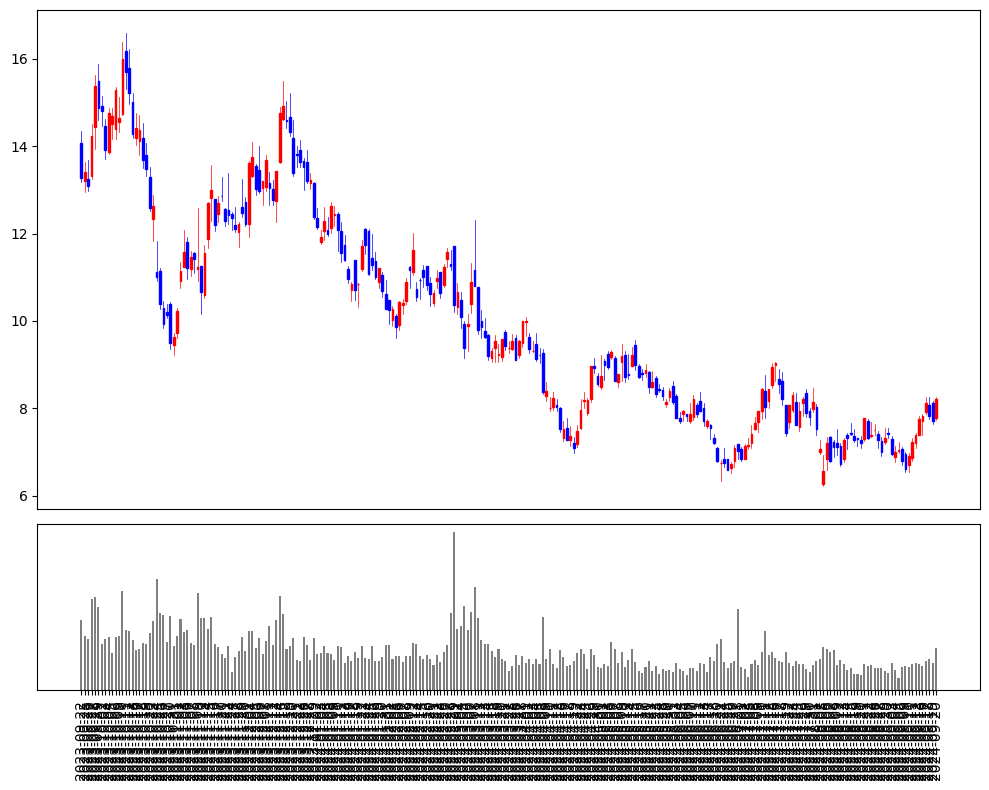

In [ ]:
#주가차트와 거래량 정보 시각화

fig = plt.figure()
fig.set_facecolor('w')
# 2개의 캔버스 생성 후 1번째는 차트를 2번째는 거래량
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)

x = np.arange(len(data_.index))
ohlc = data_[['Open', 'High', 'Low', 'Close']].values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

# 봉차트
candlestick_ohlc(axes[0], dohlc, width=0.5, colorup='r', colordown='b')

# 거래량 차트
axes[1].bar(x, data_['Volume'], color='grey', width=0.6, align='center')
axes[1].set_xticks(range(len(x)))
axes[1].set_xticklabels(list(data_.index.strftime('%Y-%m-%d')), rotation=90)
axes[1].get_yaxis().set_visible(False)

plt.tight_layout()

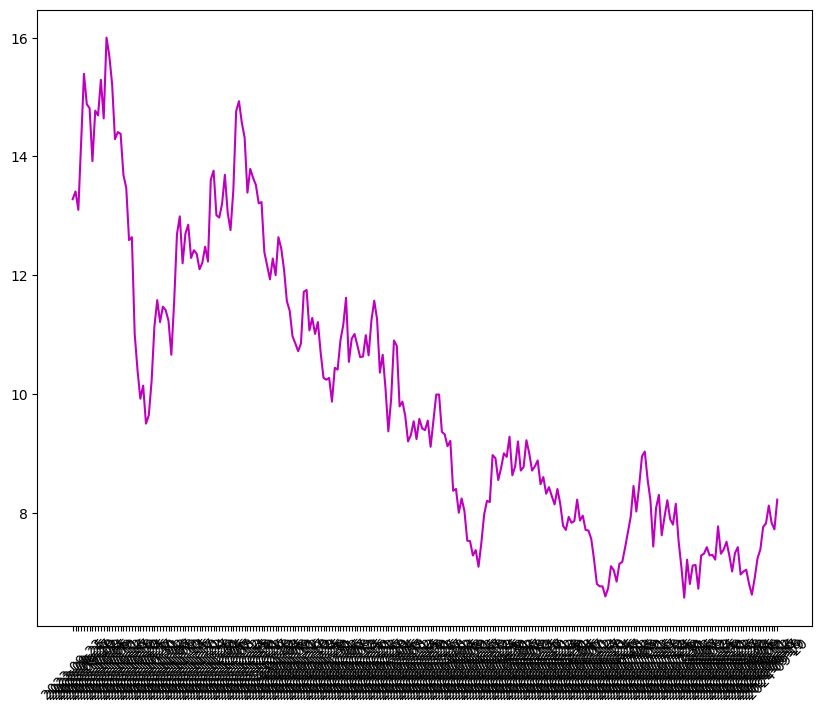

In [ ]:
close = data_['Close']
plt.plot(data_['Close'].values, color='m')
plt.xticks(np.arange(len(data_['Close'])), data_['Close'].index.strftime("%Y-%m-%d"), rotation=45)
plt.show()

In [ ]:
# 기준 패턴을 정규화
base = (close[-5:] - close[-5:].min()) / (close[-5:].max() - close[-5:].min())
base

,Close
Date,
2024-09-16,0.200001
2024-09-17,0.799999
2024-09-18,0.220000
2024-09-19,0.000000
2024-09-20,1.000000


In [ ]:
# 비교할 데이터 범위 설정
next_date = 5  # 예측할 날 수

In [ ]:
#검색 횟수
moving_cnt=len(data)-window_size-next_date-1

In [ ]:
# 코사인 유사도 계산 함수
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [ ]:
# 코사인 유사도를 계산하여 저장할 리스트
sim_list = []

for i in range(moving_cnt):
    # 데이터 범위 내에서 타겟 설정 (window_size 만큼)
    target = data_['Close'].iloc[i:i + window_size]

    # 정규화
    target = (target - target.min()) / (target.max() - target.min())

    if len(target)<window_size:
        continue

    # 코사인 유사도 계산
    cos_similarity = cosine_similarity(base.values, target.values)

    # 유사도 저장
    sim_list.append((cos_similarity, i))

In [ ]:
# 상위 20개 유사도 값 정렬
top_matches = sorted(sim_list, key=lambda x: x[0], reverse=True)[:20]
top_matches

[(1.0, 246),
 (0.9800041313826808, 210),
 (0.9768827274726262, 157),
 (0.9441709630843225, 24),
 (0.9440845796168126, 53),
 (0.9417570039036863, 168),
 (0.9416108777608929, 154),
 (0.9337591279525491, 219),
 (0.9220204599600645, 175),
 (0.9203319845593148, 190),
 (0.9157114791911077, 122),
 (0.8903279803513423, 187),
 (0.8895092670386819, 89),
 (0.8846345835531159, 32),
 (0.8818783150752653, 207),
 (0.8804646139708503, 228),
 (0.8797978687638287, 125),
 (0.8783683260365209, 198),
 (0.8679282996184237, 43),
 (0.8604253380775161, 231)]

In [ ]:
# 상위 3개 유사도 값 정렬 및 추출
top_matches = sorted(sim_list, key=lambda x: x[0], reverse=True)[1:4]

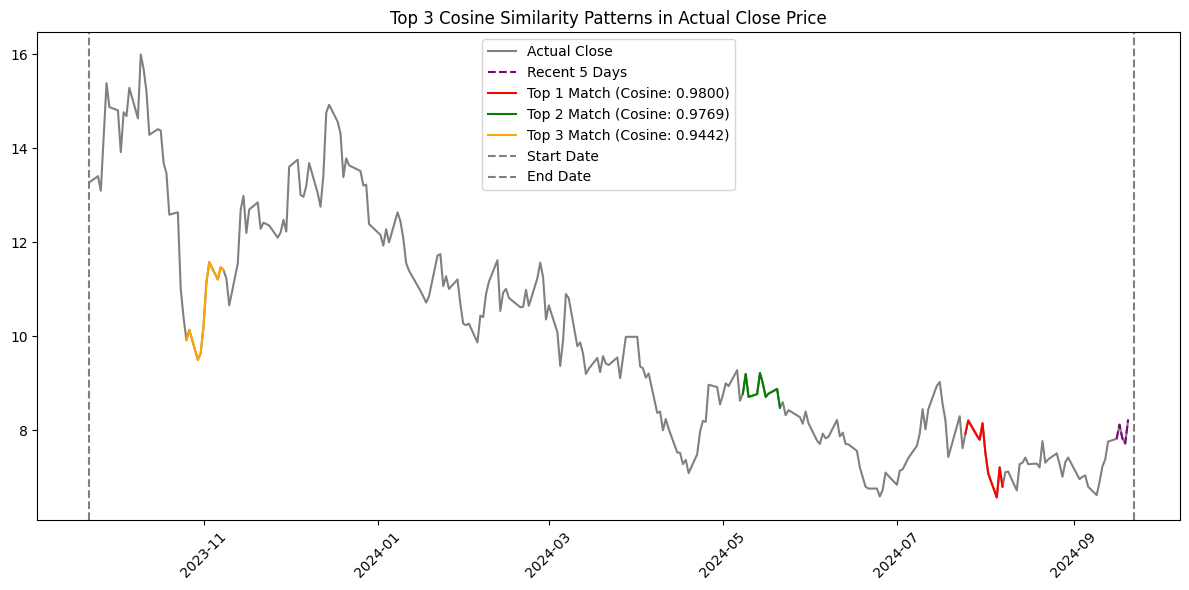

In [ ]:
# 전체 주가 차트 그리기
plt.figure(figsize=(12, 6))

# startdate와 enddate를 pd.Timestamp 형식으로 변환
startdate_ts = pd.Timestamp(startdate)
enddate_ts = pd.Timestamp(enddate)

# startdate와 enddate 기간 동안의 주가 데이터 추출
data_range = data_.loc[startdate_ts:enddate_ts]

# 전체 주가 그래프
plt.plot(data_range.index, data_range['Close'], label='Actual Close', color='gray')

# 최근 5일 기준 패턴 표시
base_range = data_['Close'].iloc[-5:].index
plt.plot(base_range, data_['Close'].iloc[-5:], label='Recent 5 Days', color='purple', linestyle='--')

# 상위 3개의 패턴 표시
colors = ['red', 'green', 'orange']
for idx, (cos_sim, match_idx) in enumerate(top_matches[:3]):
    # 패턴의 인덱스 추출
    target_idx = data_['Close'].iloc[match_idx:match_idx + window_size + next_date].index

    # 패턴이 startdate와 enddate 기간에 속하는지 확인
    pattern_range = data_.loc[target_idx[0]:target_idx[-1]]
    if not pattern_range.empty:
        # 실제 주가 데이터에서 해당 인덱스 범위에 해당하는 패턴 표시
        plt.plot(pattern_range.index, pattern_range['Close'],
                 label=f'Top {idx+1} Match (Cosine: {cos_sim:.4f})', color=colors[idx])

# 날짜 포맷 및 시각적 설정
plt.xticks(rotation=45)
plt.axvline(startdate_ts, color='grey', linestyle='--', label='Start Date')
plt.axvline(enddate_ts, color='grey', linestyle='--', label='End Date')

# 범례 및 그래프 설정
plt.legend()
plt.title('Top 3 Cosine Similarity Patterns in Actual Close Price')
plt.tight_layout()
plt.show()

